# Práctica 4

## Analizando los datos abiertos del Ayuntamiento de Alcobendas: Población. Empadronados organizados en totales y por grupos de edad y sexo. Histórico

Data set (su traducción al español sería "conjuntos de datos") significa "[una colección de datos separados de información que son tratados como una unidad total por el ordenador](https://dictionary.cambridge.org/es/diccionario/ingles/dataset) los cuales son  susceptibles de ser reutilizados (por sí solos o mezclados con otros datos) con el fin de crear servicios de interés para ciudadanos, empresas u organizaciones" 

En la siguiente práctica se trabajará con el conjunto de valores obtenidos a partir del [portal de datos abiertos del gobierno](https://datos.gob.es/es/) que nos vincula con la [página web](https://www.alcobendas.org/es/ayuntamiento) del Ayuntamiento de Alcobendas. A través de la misma podemos acceder a un amplio conjunto de bases de datos en relación con su administración. Con esta plataforma el ayuntamiento quiere asegurar una buena política de transparencia ante la ciudadanía. Gracias a la licencia de uso (propiedad abierta) hemos podido acceder y descargar los datos para reutilizarlos en la presente práctica (en formato csv). En concreto a continuación vamos tratar valores relacionados con las personas empadronadas en la localidad.  


Para analizar los datos seguiremos los pasos aprendidos en la práctica anterior. Profundizando y explorando nuevas formas de representación.

## Empadronados en Alcobendas

Para poder trabajar en profundidad con los datos primero vamos a centrarnos en qué consiste un padrón y cuáles son los requisitos necesarios para poder empadronarse en este municipio

El Padrón de Habitantes es el registro por el que se acredita la residencia y el domicilio a efectos administrativos de los vecinos de una localidad. Toda persona que viva en España debe estar inscrita en el padrón de su municipio de residencia habitual. 

Los menores no emancipados o personas dependientes deben figurar empadronadas en el domicilio de sus padres o representantes legales. La inscripción en el padrón de los recién nacidos se realiza a través del Registro Civil.

Para poder aparecer en el padrón se deben presentar los documentos requeridos, los cuales variarán según el solicitante (persona mayor de edad, padres con hijos menores, establecimientos colectivos como conventos...) El plazo máximo para resolver el empadronamiento son los tres meses posteriores a la solicitud.

## Configuración de pandas y folium

Lo primero es configurar el lenguaje Pandas usándolo como pd. Como se explicó en la práctica anterior, Pandas es una librería especializada en el manejo y análisis de de datos que nos permite trabajar con diferentes tipos de estructuras 

In [1]:
import pandas as pd

También tenemos que instalar el folium (un folium es una biblioteca, una herramienta de visualización que permite la concepción de mapas interactivos). En el caso de esta práctica en concreto no nos interesa especialmente la representación por mapas ya que estamos trabajando con datos demográficos de un punto cardila singular 

In [2]:
!pip install folium 

In [3]:
!pip install pandas

In [4]:
import pandas as pd
import folium

## Creamos la variable

Los datos los hemos obtenido a través de una [URL](https://datos.alcobendas.org/dataset/poblacion-empadronados-totales-y-grupos-de-edad-y-sexo-historico) de la que hemos descargado su correspondiente archivo en csv 

Las variables se asignan con el símbolo `=` y la url se escribe entre comillas porque es una cadena de caracteres (string). En la función utilizaremos la abreviatura "alco" refiriéndonos a alcobendas.

In [ ]:
url_alco = 'https://datos.alcobendas.org/dataset/d8710e65-fe6b-449e-a8e7-26c58e6f7326/resource/826375e4-e7f5-4627-9f16-978d0a0ad5dc/download/poblacion-de-alcobendas.-historiconueva-version.csv'

## Crear DataFrame

El DataFrame se define como `df`. A lo que añadiremos `pd` porque es como hemos nombrado a Pandas (biblioteca de python que tenemos ya instalada). Seguido de `read_csv` que es la parte de la función que nos permite leer archivos en csv (Excel). Entre paréntesis se encuentra el valor que queremos que lea. En este caso la url con los datos del padrón de Alcobendas que ya ha sido previamente definida como una variable.

In [13]:
df = pd.read_csv(url_alco)

In [14]:
df

,Año,Intervalo,Hombres,Mujeres,Total
0,1998,0-4 años,2261,2194,4455
1,1998,5-9 años,2520,2336,4856
2,1998,10-14 años,2894,2759,5653
3,1998,15-19 años,3756,3713,7469
4,1998,20-24 años,4977,4672,9649
...,...,...,...,...,...
435,2017,85-89 años,417,735,1152
436,2017,90-94 años,146,398,544
437,2017,95-99 años,22,114,136
438,2017,Más de 100 años,5,27,32


Se ha generado como vemos una tabla, un dataframe (una estructura de datos con varias dimensiones en la que se puede guardar valores de distintos tipos organizados en columnas) de Python, que proviene del csv obtenido de la página web del ayuntamiento. La tabla está conformada por cinco columnas de datos más la columna de control de Pandas (columna índice). A simple viste podemos obtener información por grupos de edad del número de mujeres y hombres residentes en acolbendas a lo largo de los últimos veinticuatro años.

## Explorar la información de la tabla

Como se ha dicho previamente cinco de las seis columnas de la tabla nos aportan información relevante a los datos extraídos de la url. Para poder jugar con estos valores y explorarlos utilizaremos dos funciones: `df_alco.info()` para obtener información general del DataFrame o `df_alco.columns` cuando queramos conocer específica las características de una de las columnas que conforma la tabla.

In [15]:
df_alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Año        440 non-null    int64 
 1   Intervalo  440 non-null    object
 2   Hombres    440 non-null    int64 
 3   Mujeres    440 non-null    int64 
 4   Total      440 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.3+ KB


A través de esta función conocemos todas las variables de nuestros datos: año, intervalo, género, total... Es una forma muy útil de tener desgranada la vasta cantidad de información que se nos presenta para poder así decidir cuáles utilizaremos y de qué manera

In [20]:
df_alco.columns

Index(['Año', 'Intervalo', 'Hombres', 'Mujeres', 'Total'], dtype='object')

En el caso de querer conocer el valor concreto de una columna tenemos que utilizar la función `df_alco['nombre de la columna']`. Por ejemplo, a continuación exploraremos los valores correspondientes a la columna de mujeres y de hombres en dos apartados diferenciados gracias a esta función (lo que nos permitirá trabajar más fácilmente con ellos).

In [18]:
df_alco['Mujeres']

0       2194
1       2336
2       2759
3       3713
4       4672
       ...  
435      735
436      398
437      114
438       27
439    59658
Name: Mujeres, Length: 440, dtype: int64

In [58]:
df_alco['Intervalo']

0             0-4 años
1             5-9 años
2           10-14 años
3           15-19 años
4           20-24 años
            ...       
435         85-89 años
436         90-94 años
437         95-99 años
438    Más de 100 años
439            Total  
Name: Intervalo, Length: 440, dtype: object

Acabamos de elegir las columnas con las que vamos a trabajar: mujeres y años. Por medio de set index fijamos una de las columnas del DataFrame como índice, en nuestro caso marcaremos "años" como tal, cuyos valores sustirán a la columna índice de Pandas. Lo conseguiremos gracias a la función: `df_alco.set_idex`

In [57]:
df_alco.set_index('Intervalo')

,Año,Hombres,Mujeres,Total
Intervalo,,,,
0-4 años,1998,2261,2194,4455
5-9 años,1998,2520,2336,4856
10-14 años,1998,2894,2759,5653
15-19 años,1998,3756,3713,7469
20-24 años,1998,4977,4672,9649
...,...,...,...,...
85-89 años,2017,417,735,1152
90-94 años,2017,146,398,544
95-99 años,2017,22,114,136


Nuestro propósito es acabar por crear un gráfico con los valores 'años' y 'mujeres', por lo que precisamos de una tabla que cuente con tan solo dos columnas (años y mujeres). Utilizaremos la función `df_alco.set_index`que sería el comando de agrupando en dos columnas.

In [56]:
df_alco.set_index('Intervalo')['Mujeres']

Intervalo
 0-4 años           2194
 5-9 años           2336
 10-14 años         2759
 15-19 años         3713
 20-24 años         4672
                   ...  
85-89 años           735
90-94 años           398
95-99 años           114
Más de 100 años       27
Total              59658
Name: Mujeres, Length: 440, dtype: int64

## Crear tablas

A la fórmula anterior le añadiremos 'plot' para crear un gráfico y un título a la vez: `df.set_index('Año')['Mujeres'].plot(title=...)`

<AxesSubplot:title={'center':'Número de mujeres en Alcobendas a lo largo de los años'}, xlabel='Intervalo'>

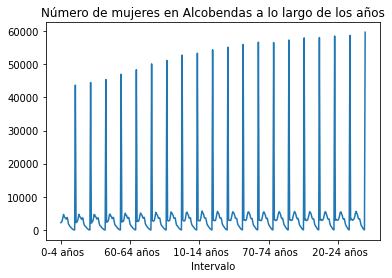

In [55]:
df.set_index('Intervalo')['Mujeres'].plot(title='Número de mujeres en Alcobendas a lo largo de los años')

In [59]:
df.set_index('Intervalo')['Mujeres'].unique()

array([ 2194,  2336,  2759,  3713,  4672,  3983,  3750,  3382,  3289,
        3752,  3205,  1843,  1444,  1098,   893,   627,   443,   218,
          80,     9,     1, 43691,  2198,  2300,  2632,  3400,  4709,
        4225,  3837,  3594,  3201,  3635,  3538,  2097,  1437,  1196,
         949,   673,   461,   293,    95,    22, 44493,  2047,  2344,
        2606,  3264,  4676,  4531,  3970,  3820,  3275,  3520,  3642,
        2370,  1433,  1243,   989,   713,   474,   334,   118,     3,
       45394,  2301,  2427,  2594,  3119,  4505,  4804,  4174,  4080,
        3445,  3466,  3762,  2516,  1620,  1300,  1032,   814,   477,
         383,   136,    34,     5, 46994,  2395,  2549,  2540,  3034,
        4250,  5033,  4373,  4353,  3565,  3547,  3778,  2833,  1696,
        1385,  1054,   846,   518,   402,   158,    39,     8, 48356,
        2545,  2597,  2613,  3063,  4220,  5119,  4640,  4482,  3817,
        3546,  3825,  3207,  1836,  1436,  1122,   866,   574,   393,
          36, 50100,

<AxesSubplot:title={'center':'Número'}, xlabel='Intervalo'>

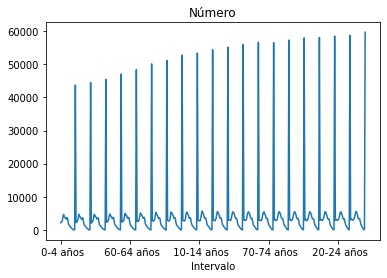

In [60]:
df.set_index('Intervalo')['Mujeres'].plot(title='Número')

Acabamos de probar no hay cambios significativos en la elaboración del gráfico al abarcar todos los datos o seleccionarlos sin su reiteración.

## Otro tipo de gráficos

### Gráfico de dispersión

<AxesSubplot:xlabel='Intervalo', ylabel='Mujeres'>

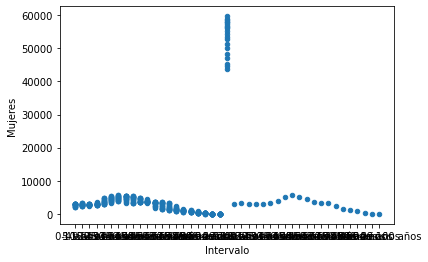

In [61]:
df = pd.read_csv('https://datos.alcobendas.org/dataset/d8710e65-fe6b-449e-a8e7-26c58e6f7326/resource/826375e4-e7f5-4627-9f16-978d0a0ad5dc/download/poblacion-de-alcobendas.-historiconueva-version.csv')
df.plot(kind = 'scatter', x = 'Intervalo', y = 'Mujeres')

Los dos gráficos que hemos hecho hasta ahora no nos son especialmente útiles porque las variables se acumulan. 

### Gráfico de barras

Según el [Instituto Nacional de Estadística (INE)](https://www.ine.es/explica/docs/pasos_tipos_graficos.pdf) los gráficos de barras son una "representación gráfica en un eje cartesiano de las frecuencias de una variable cualitativa o discreta. En uno de los ejes se posicionan las distintas categorías o modalidades de la variable cualitativa o discreta y en el otro el valor o frecuencia de cada categoría en una determinada escala".

Para representar datos relacionados con los índices de población la gráfica de barras es interesante ya que nos permite realizar comparativas de forma rápida. A continuación vamos a intentar generar un gráfico de barras con la variable 'Mujeres' en relación a los grupos de edad por 'Intervalos'.

In [63]:
df["Intervalo"].plot(kind = 'hist', x = 'Mujeres', y = 'Intervalo')

TypeError: no numeric data to plot

## Gráfico de barras

Al intentar hacer un gráfico de barras con los valores de 'Intervalo' y 'Mujeres' nos da erorr porque los datos relacionados con los grupos de edad no son numéricos y por lo tanto el gráfico no puede leerlos. A continuación intentaremos generar una gráfica de barras poniendo en relación el número de mujeres con los totales de población.

In [64]:
df_alco['Total']

0        4455
1        4856
2        5653
3        7469
4        9649
        ...  
435      1152
436       544
437       136
438        32
439    114864
Name: Total, Length: 440, dtype: int64

In [111]:
df_alco.set_index('Intervalo')

,Año,Hombres,Mujeres,Total
Intervalo,,,,
0-4 años,1998,2261,2194,4455
5-9 años,1998,2520,2336,4856
10-14 años,1998,2894,2759,5653
15-19 años,1998,3756,3713,7469
20-24 años,1998,4977,4672,9649
...,...,...,...,...
85-89 años,2017,417,735,1152
90-94 años,2017,146,398,544
95-99 años,2017,22,114,136


In [118]:
df_alco.set_index('Intervalo')['Mujeres']

Intervalo
 0-4 años           2194
 5-9 años           2336
 10-14 años         2759
 15-19 años         3713
 20-24 años         4672
                   ...  
85-89 años           735
90-94 años           398
95-99 años           114
Más de 100 años       27
Total              59658
Name: Mujeres, Length: 440, dtype: int64

<AxesSubplot:ylabel='Frequency'>

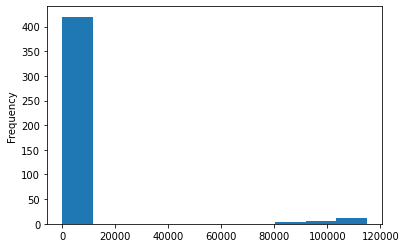

In [182]:
df["Total"].plot(kind = 'hist', x = 'Mujeres' , y='Hombres')

En este caso hemos podido extraer un gráfico de barras, sin embargo como no se ha definido de manera concreta el rango y además, los dos valores de datos recogen números muy grandes y amplios, el resultado es cuanto menos esclarecedor. Siguiendo la definición previamente citada del INE, el resultado obtenido no es válido en tanto que no hay una variable de tipo cualitativa o discreta como tal, solo dos frecuencias determinadas a escala. Seguiremos probando.

## Cambiamos los valores

Primero acotaremos un rango: el año 1998 que se divide en veintiún subgrupos de edades. 

El método plot de Pandas tiene un parámetro kind que nos permite cambiar el tipo de gráfico que queremos dibujar. En este caso, gracias a esta posibilidad para obtener un diagrama de barras solo tenemos que indicar que la gráfica que requerimos es de tipo "bar", es decir tenemos que escribir `kind='bar`

Antes de la revisión de la práctica estábamos trabajando con cuatro columnas de datos (hombres, mujeres, total y año). Sin embargo no tenía ningún tipo de sentido ya que lo que se quería comparar era el número de hombres y mujeres en Alcobendas clasificados por grupos de edad independientes (no se requería la suma de los mismos, es decir, el valor de los totales) durante la constante del año 1998 (era un error que apareciese en la gráfica porque no aportaba ninguna información últil). 

In [166]:
df_alco.columns

Index(['Año', 'Intervalo', 'Hombres', 'Mujeres', 'Total'], dtype='object')

In [167]:
print(df[['Hombres','Mujeres']])
muestra = df[:21].copy()

                 Hombres  Mujeres
Intervalo                        
 0-4 años           2261     2194
 5-9 años           2520     2336
 10-14 años         2894     2759
 15-19 años         3756     3713
 20-24 años         4977     4672
...                  ...      ...
85-89 años           417      735
90-94 años           146      398
95-99 años            22      114
Más de 100 años        5       27
Total              55206    59658

[440 rows x 2 columns]


A continuación hemos acotado la muestra a nivel del número de personas `df[]`y los valores representados por medio de un doble corchete `[[]]`

In [171]:

import matplotlib.pyplot as plt
%matplotlib inline


muestra = df[:21][['Hombres','Mujeres']]
muestra

,Hombres,Mujeres
Intervalo,,
0-4 años,2261,2194
5-9 años,2520,2336
10-14 años,2894,2759
15-19 años,3756,3713
20-24 años,4977,4672
25-29 años,4007,3983
30-34 años,3502,3750
35-39 años,3196,3382
40-44 años,2749,3289


Una vez acotado los grupos de datos, nos disponemos a representarlos a través de diferentes gráficas. La primera será un gráfico de líneas que nos permite estudiar a simple vista la evolución del número de hombres y mujeres según cada grupo de edad.

<AxesSubplot:title={'center':'1998'}, xlabel='Intervalo'>

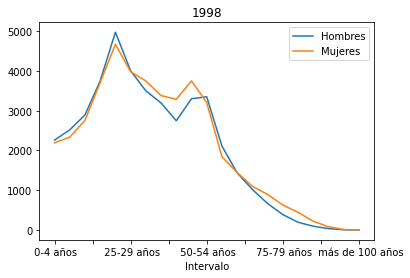

In [173]:
muestra.plot(title='1998')

<AxesSubplot:xlabel='Intervalo'>

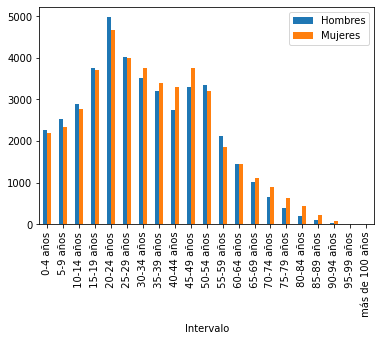

In [187]:
muestra.plot(kind = 'bar')


Se ha generado un gráfico de barras con el total de población por grupos de edad como eje de las x y dos barras (naranja:mujeres, azul:hombres). 

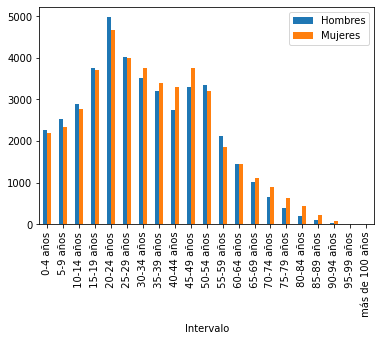

In [181]:
muestra.plot(kind = 'bar');
muestra1998 = [('Hombres') , ('Mujeres')]

Cada vez que dibujamos un gráfico nos aparece un texto que acredita que se ha ejecutado la última instrucción ejecutada. Para que no se reitere continúamente adjuntaremos un punto y una coma `(;)`al final de la instrucción

El resultado es que cada barra representa el valor de una columna del DataFrame. 

Podemos alterar la dirección de las barras de vertical a horizontal sustituyendo bar por barh (h de horizontal). Es decir, la fórmula sería `kind = 'barh'`) 

### Gráfico de barras horizontales

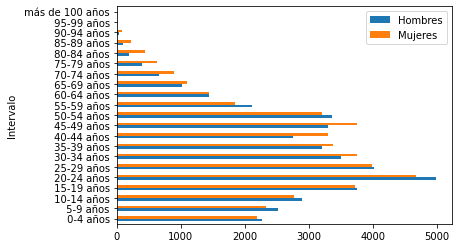

In [176]:
muestra.plot(kind = 'barh');

El grosor de las barras se establece de manera automática, podemos modificarlas paras hacerlas más accesibles a nivel visual con el parámetro `width`, que nos permite oscilar entre 0 y 1. Por defecto la función establece un grosor de 0.5. Vamos a mostrar las barrar con su máximo de grosor y con 0.2.

<AxesSubplot:ylabel='Intervalo'>

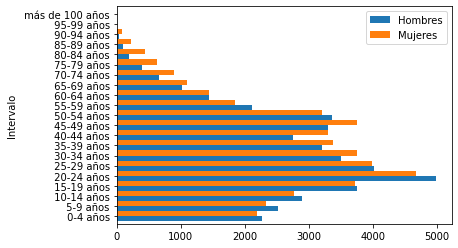

In [177]:
muestra.plot(kind = 'barh', width=1)

<AxesSubplot:ylabel='Intervalo'>

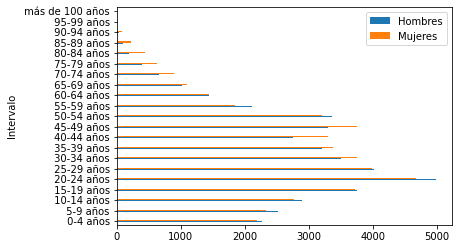

In [178]:
muestra.plot(kind = 'barh', width=0.2)

### Gráfico de barras apiladas

Por medio del parámetreo stacked podemos generar gráficos de barras apiladas. Entre sus opciones de diseño podemos establecer cierto nivel de transparencia a los colores de las barras.

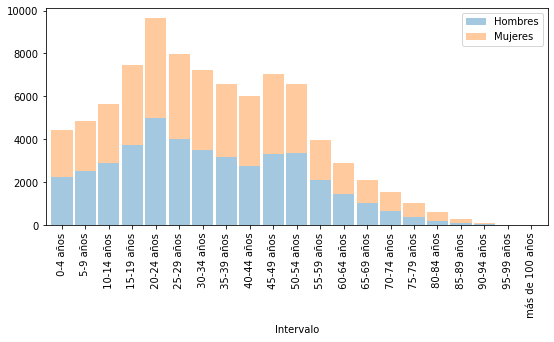

In [179]:
muestra.plot(kind = 'bar', 
             stacked = 'True',
             alpha = 0.4,
             width = 0.9, 
             figsize=(9,4));

Este tipo de gráfico también es interesante porque es muy visual permitiéndonos discernir los datos y hacer comparativas rápidamente.

### Gráfico de barras separados

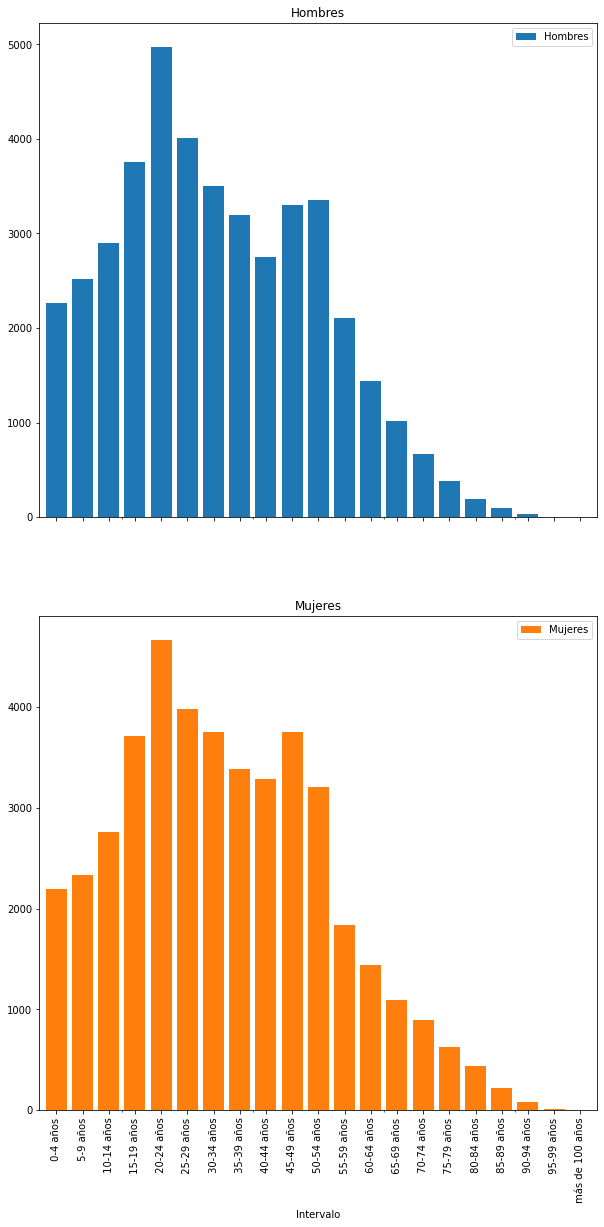

In [180]:
muestra.plot(kind = 'bar',
             width=0.8,
             subplots=True,
             figsize=(10,20));

## 